In [28]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from utils import *
from datetime import datetime
from sklearn.model_selection import train_test_split

# Data loading

I'll load the data from the csv file and check the first 10 rows to get a basic notion about the data itself before start working on it.


In [2]:
data_path = './data/dataset_SCL.csv'
df = pd.read_csv(data_path)

/var/folders/5s/vdx10l697jb5phtp2_z31l8m0000gn/T/ipykernel_59328/604993815.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [3]:
df.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


## Quick data check

I want to check the data types after the dataset import as well as know how many rows the dataset has. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


# Exploration data analysis (EDA)

Before answer the first question, I'd like to know about the data, min and max values for the numeric features. On the other hand which values the categoricals feature takes.

The first actions is check how many null values the features have. With this information in mind we can take actions like try to fill the null values from a particular feature. The filling process could be for example take the most common value and fill with it, or and average of all the value if the feature is numeric.


In [5]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

As we can see the feature **Vlo-O** is the only one that has null values. Due to it just has one null value we don't lose information if we drop out these row. Also, in the previous step we can see that the dataset has **68206 rows**, so we won't lose much data. Hence I will to procede to delete it.

In [6]:
# droping the missing value
df = df.dropna()  

### Checking the Date feature

At first glance looking for the min and max date in **Fecha-I** (flight schedulled date and time) I realized that all the dataset rows are for the same year, 2017.
But I do a cross validation checking the column Año. There I saw that there are two year 2017 and 2018. 

Filtering the date with the new discovered year we just get two rows. Moreover if we see these filtered row, we will discover that the two flights were operated in the new years. So this new year value cann't affect the analysis and future predictions.

In [7]:
f"Minimun date in the dataset {df['Fecha-I'].min()}. Max date in the dataset {df['Fecha-I'].max()}"

'Minimun date in the dataset 2017-01-01 00:15:00. Max date in the dataset 2017-12-31 23:55:00'

In [8]:
f"Different years in the AÑO feature: {df['AÑO'].unique()}"

'Different years in the AÑO feature: [2017 2018]'

In [9]:
df[df['AÑO'] == 2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


### Plotting data
Let's a graphical interpretation of the data and what the data can tell about it.

We'll see severl graph that aims to undercover the underlying information

<AxesSubplot:title={'center':'Most operated Airline'}, xlabel='count', ylabel='OPERA'>

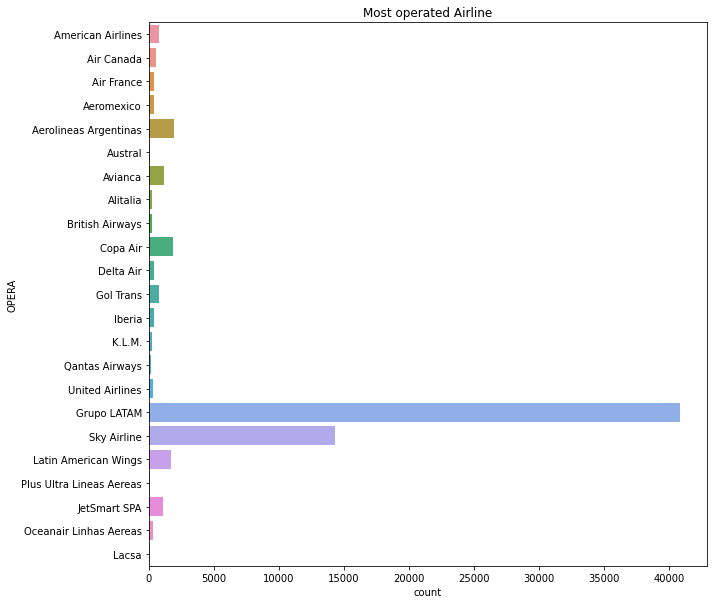

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.title('Most operated Airline')
seaborn.countplot(y=df['OPERA'])

Due to Grupo LATAM has the most number of operation, I'll check how many company operate by this group and if there are more groups.

Below we see that Grupo LATAM has 7 arline company. Also we can see an small group, Latin American Wings, with two airlines.
Because we can assume that the **OPERA** column is a generalization and the **Emp-I** will provide redudant data to the future model we can delete Emp-I witout lose information.

In [11]:
for o in df.OPERA.unique(): 
    tmp = df[df.OPERA==o]
    if len(tmp['Emp-I'].unique())>1:
        print(f'Group: {o}')
        print(f">>>Airlines: {tmp['Emp-I'].unique()}")

Group: Grupo LATAM
>>>Airlines: ['LAP' 'TAM' 'LAN' 'LXP' 'LNE' 'LPE' 'DSM']
Group: Latin American Wings
>>>Airlines: ['LAW' 'JMR']


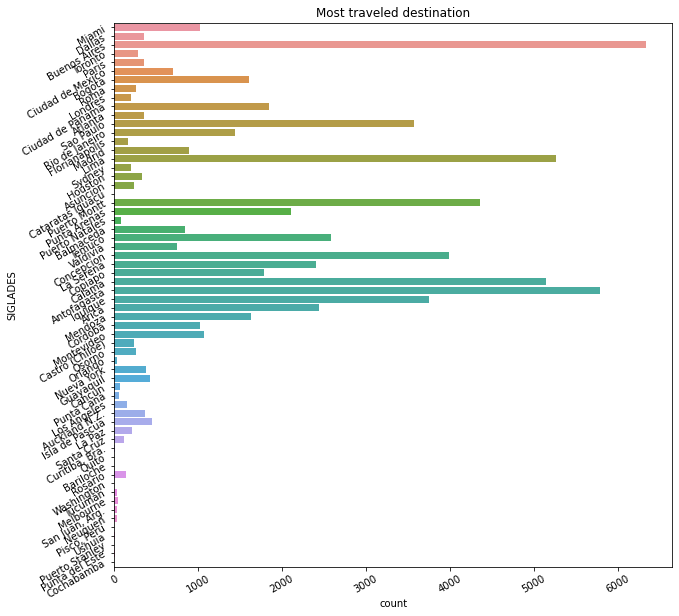

In [12]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df['SIGLADES'])
plt.title('Most traveled destination')
plt.tick_params(labelrotation=30)

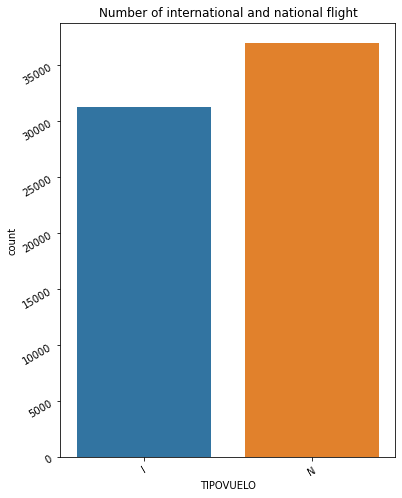

In [13]:
fig = plt.figure(figsize=(6, 8))
seaborn.countplot(x=df['TIPOVUELO'])
plt.title('Number of international and national flight')
plt.tick_params(labelrotation=30)

/var/folders/5s/vdx10l697jb5phtp2_z31l8m0000gn/T/ipykernel_59328/3782563092.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


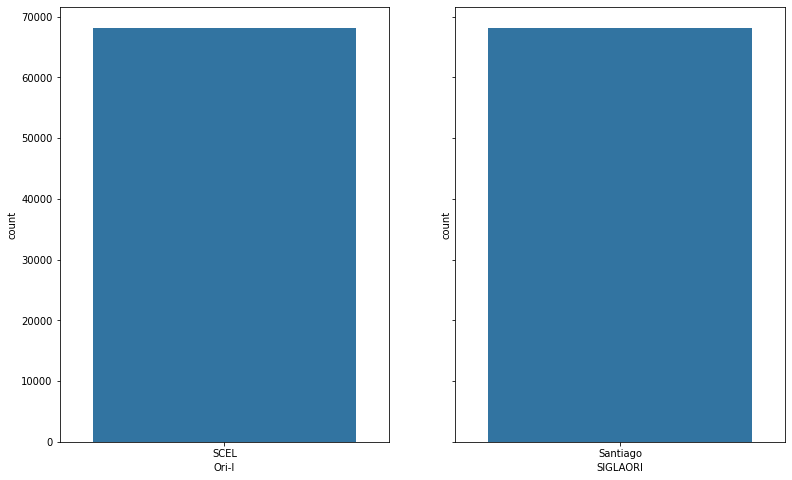

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,8), sharey='row')
seaborn.countplot(x=df['Ori-I'], ax=ax[0])
seaborn.countplot(x=df['SIGLAORI'], ax=ax[1])

fig.show()

## Answer 1

I took the data and I learnt about the dataset without taking into account the target column. Because it's possible to get knowdledge and notion regardless the target.

### First Conclusions

These dataset present flights between Junary and December of 2017. Also the data shows the next insights: 
* The most operated airles are part of Grupo Latam and Sky Airlines with at least 10000 opeartions. There are a few companies with at most 2500 opeartions.
* All the departures start from SCEL aiport (Santiago de Chile) thereby the predictions of the model will be related (or biased) from this departure city.

This insight are important because we can see that the dataset is biased or disvalanced realted to the departure airport as well as with the airlines that operate the flights. But we cann't assume in this instance that the delays is due to these airlines.

A deep analysis will be do after achive the next step getting the delay column. And we can show the distrubution of the data based on the target as well as answer questions like:
* Are there more delays on international or national flights?
* What is the proportion between on time and delayed flights?
* There is a correlation between a period of the day and the delay?

# Data transformation

In this section, I'll create the new columns and later save them into a new csv file. The code related to the column creation can be checked inside the **utilis.py** file.

In [15]:
df['temporada_alta'] = df.apply(lambda x: is_high_season(x), axis=1)

/Users/nestornav/dev/me/test/assestments/ml_airplane_delay/utils.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if (now_date >= pd.to_datetime('2017-12-15') and now_date <= pd.to_datetime('2017-03-03'))\
/Users/nestornav/dev/me/test/assestments/ml_airplane_delay/utils.py:10: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  or (now_date >= pd.to_datetime('2017-07-15') and now_date <= pd.to_datetime('2017-07-31'))\
/Users/nestornav/dev/me/test/assestments/ml_airplane_delay/utils.py:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard libr

In [16]:
df['dif_min'] = df.apply(lambda x: flight_delay(x), axis=1)

In [17]:
df['atraso_15'] = df.apply(lambda x: has_delay(x), axis=1)

In [18]:
df['periodo_dia'] = df.apply(lambda x: get_day_period(x), axis=1)

### Saving the features
The cell bellow will dump the new created features into the data directory. Using the **path** variable, you can customize the place where you can save the data without modify the other part of the code.

In [20]:
path = './data/synthetic_features.csv'
dump_data(df, path)

# Delay time analysis
With the new data created I will analyze the delay and how it is related to others features. First of all I want to check the proportion of on time and delayed flights.

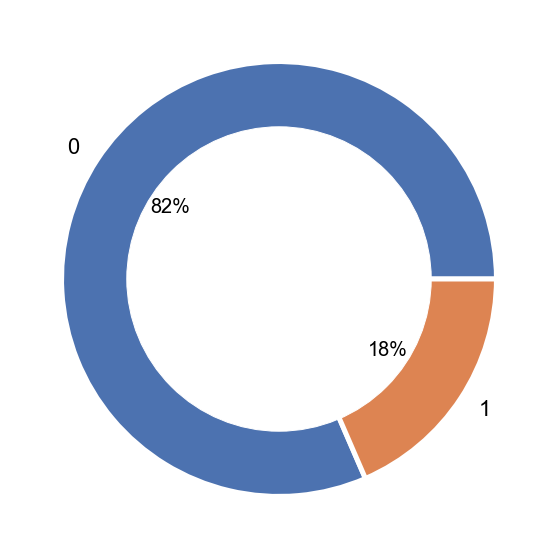

In [51]:
pie_plot(df)

Surprisingly the proportions of delayed flight is less than 20% of the total of the flights in the 2017 year.

Now, I'd like to know how the delay time distribution behave.

Text(0.5, 17.599999999999994, 'Delay (mins)')

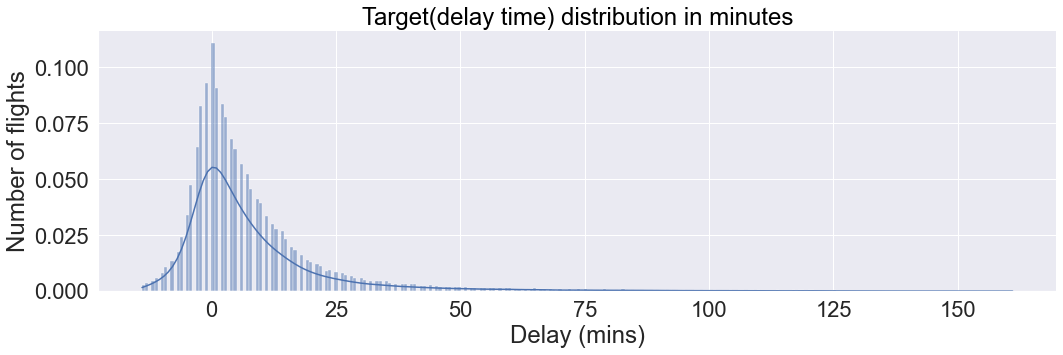

In [82]:
seaborn.displot(data=df, x=df['dif_min'], aspect=3, kde=True, stat='density') 
plt.ticklabel_format(style='plain', axis='x')
plt.title('Target(delay time) distribution in minutes')
plt.ylabel('Number of flights')
plt.xlabel('Delay (mins)')

As can see, the distribution is centered around zero with a long tail to the right. There a several values after the fifty minutes of delay. This outliers values need to be evaluated more further to identify the possible reason because they can cause some issues in the predictions.

Text(0.5, 1.0, 'Proportion of on-time and dealyed flights per Airline')

<Figure size 1440x1440 with 0 Axes>

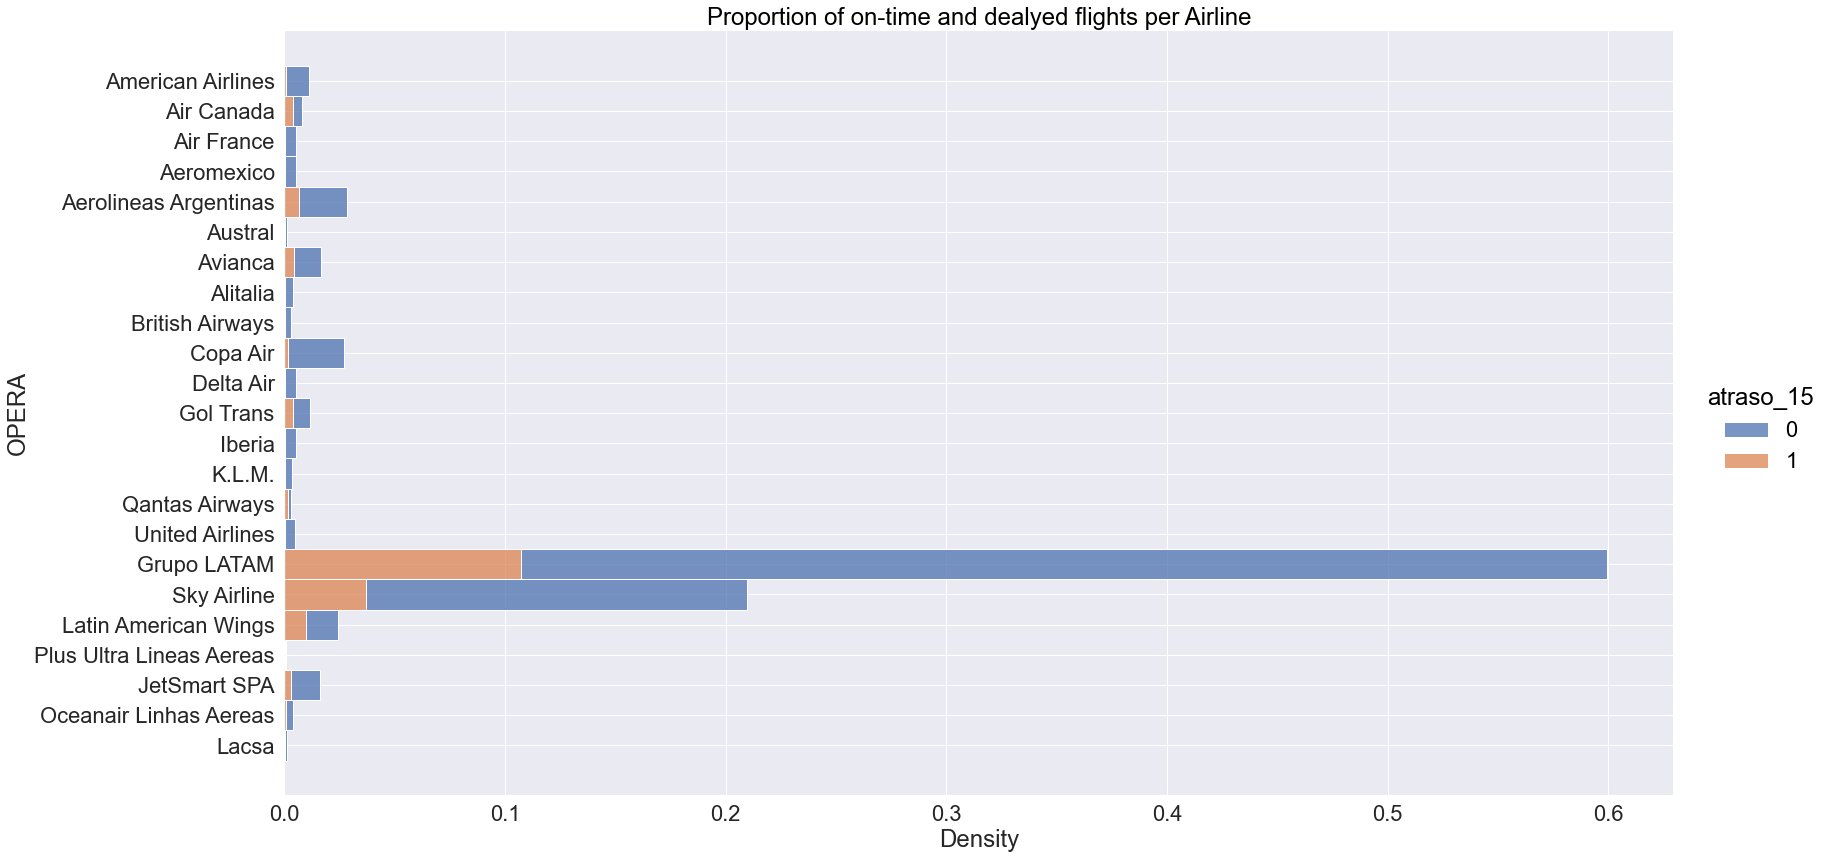

In [119]:
fig = plt.figure(figsize=(20, 20))
seaborn.displot(data=df, y='OPERA', hue="atraso_15", multiple="stack", height=12,aspect=2, stat='density')
plt.tick_params(labelrotation=0)
plt.title('Proportion of on-time and dealyed flights per Airline')

In [115]:
total_1_latam = df[df['OPERA'] == 'Grupo LATAM'].groupby('atraso_15').count()['OPERA'][1]
total_latam = df[df['OPERA'] == 'Grupo LATAM'].count()['atraso_15']

total_1_sky = df[df['OPERA'] == 'Sky Airline'].groupby('atraso_15').count()['OPERA'][1]
total_sky = df[df['OPERA'] == 'Sky Airline'].count()['atraso_15']

In [118]:
print(f"Delay proportion for Grupo LATAM: {total_1_latam/total_latam}")
print(f"Delay proportion for Sky Airlines: {total_1_sky/total_sky}")

Delay proportion for Grupo LATAM: 0.17866575369265383
Delay proportion for Sky Airlines: 0.1776472233878864


Here is even more clear that the delay is not a common issue for the major of the airlines. To the most busiest airlines (Latam and Sky) they have almost equal delay portion arount the **0,17** as we can see above. 

Without a business eye this result maybe we can avoid the cost to implement a machine learning model to predict the delay. But an interesting analysis could be how the delay proportion impact in business metrics such as GMV, or customer satisfaction. If the impact of the delay is considerable or even huge, the ROI of a machine learning model implementation is high.